# SOK-1006 Mikro
## Seminar 9
### Oppgave 2

Vi gjenbruker koden fra seminar 2, oppgave 2, og seminar 9, oppgave 1.

In [460]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [461]:
# definer symbolene som vi kommer til å bruke
x,p,t=sp.symbols('x p t', positive=True, real=True)

In [462]:
# Etterspørsel i likning (1)
# gjør om til invers etterspørsel for å kunne bruke koden fra oppgave 1 seminar 9
# shattering av KO, PO

def demand(x):
    return (500 - x)/3.2

#Tilbud i likning (2). Gjort om til inverstilbud

def supply(x,t):
    return (x+100+4.3*t)/4.3


### deloppgave a)

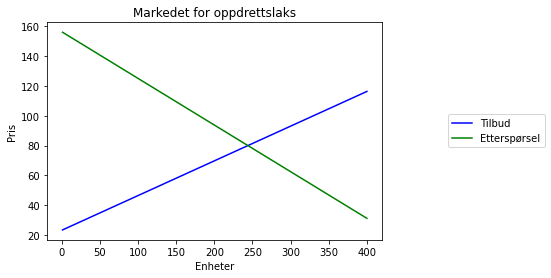

In [463]:
#Tegne markedskryss før avgift
x_num = np.linspace(1,400,100)

fig,ax=plt.subplots()
 
ax.set_ylabel('Pris')
ax.set_xlabel('Enheter')

ax.plot(x_num, supply(x_num,0),label='Tilbud', color='blue')
ax.plot(x_num,demand(x_num), label='Etterspørsel',color='green')
             


ax.legend(bbox_to_anchor=(1.5,0.6))
ax.set_title('Markedet for oppdrettslaks')

plt.show()

In [464]:
eq_1=sp.Eq(demand(x),supply(x,t))
eq_1

Eq(156.25 - 0.3125*x, 1.0*t + 0.232558139534884*x + 23.2558139534884)

In [465]:
x_eq=sp.solve(eq_1,x)[0]
x_eq

244.0 - 1.83466666666667*t

In [466]:
x_0=float(x_eq.subs([(t,0)]))
x_0

243.99999999999997

In [467]:
p_0=float(demand(x_0))
p_0

80.0

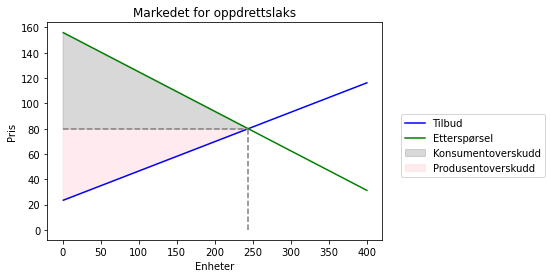

In [468]:
x_num=np.linspace(0,x_0,100)
ax.vlines(x_0,0,p_0, color='gray', ls='dashed')
ax.hlines(p_0,0,x_0, color='gray', ls='dashed') 

ax.fill_between(x_num,p_0,demand(x_num), color = "gray",alpha = 0.3,label='Konsumentoverskudd')
ax.fill_between(x_num,supply(x_num,0),p_0, color = "pink",alpha = 0.3,label='Produsentoverskudd')
    
ax.legend(bbox_to_anchor=(1.5,0.6))
fig

In [469]:
po_0=sp.integrate(p_0-supply(x,0),(x,0,x_0))
po_0

6922.79069767442

In [470]:
ko_0=sp.integrate(demand(x)-p_0,(x,0,x_0))
ko_0

9302.50000000000

In [471]:
so_0=po_0+ko_0
so_0

16225.2906976744

### deloppgave b)
Vi skal ikke tegne aksene fra (0,0) for da blir endringene veldig små.

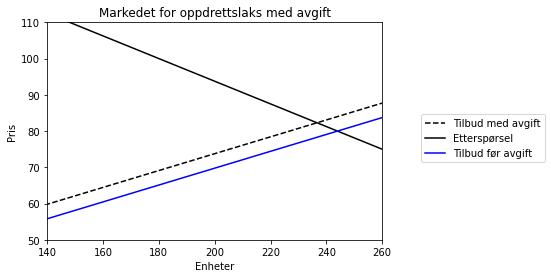

In [472]:
#Tegn tilbudet med en avgift på t=4
q=np.linspace(0,400,100)

fig,ax1=plt.subplots()
 
ax1.set_ylabel('Pris')
ax1.set_xlabel('Enheter')

ax1.plot(q, supply(q,4),label='Tilbud med avgift', color='black', ls='dashed')
ax1.plot(q,demand(q), label='Etterspørsel',color='black')
ax1.plot(q, supply(q,0),label='Tilbud før avgift', color='blue')
             
ax1.set_ylim([50, 110])
ax1.set_xlim([140, 260])

ax1.legend(bbox_to_anchor=(1.5,0.6))
ax1.set_title('Markedet for oppdrettslaks med avgift')

plt.show()

In [473]:
x_4=float(x_eq.subs([(t,4)]))
x_4

236.66133333333332

In [474]:
p_4=float(demand(x_4))
p_4

82.29333333333332

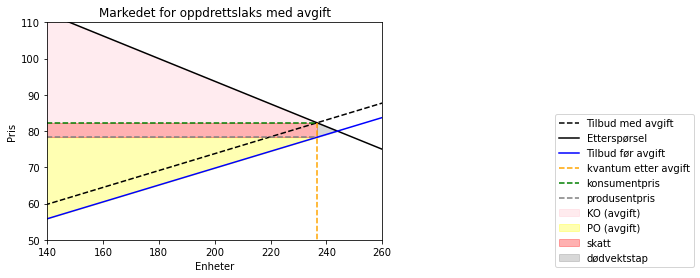

In [475]:
q=np.linspace(0,x_4,100)
ax1.vlines(x_4,0,p_4, color='orange', ls='dashed', label= 'kvantum etter avgift')
ax1.hlines(p_4,0,x_4, color='green', ls='dashed', label='konsumentpris') 
ax1.hlines(p_4-4,0,x_4, color='gray', ls='dashed', label='produsentpris')

ax1.fill_between(q,p_4,demand(q), color = "pink",alpha = 0.3,label='KO (avgift)')
ax1.fill_between(q,supply(q,0),p_4-4, color = "yellow",alpha = 0.3,label='PO (avgift)')
ax1.fill_between(q,p_4,p_4-4, color = "red",alpha = 0.3,label='skatt')

# tegn inn dødvektstapet

Q=np.linspace(x_4,x_0,100)
ax1.fill_between(Q,supply(Q,0),demand(Q), color = "gray",alpha = 0.3,label='dødvektstap')

ax1.legend(bbox_to_anchor=(1.5,0.6))

fig

### deloppgave c)

In [476]:
po_4=sp.integrate(p_4-4-supply(x,0),(x,0,x_4))
po_4

6512.62635989664

In [477]:
ko_4=sp.integrate(demand(x)-p_4,(x,0,x_4))
ko_4

8751.34167111111

In [478]:
so_4=po_4+ko_4
so_4

15263.9680310078

In [479]:
from IPython.display import Markdown

tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |${np.round(float(p_0),2)}$|${np.round(float(p_4),2)}$   |${np.round(float(p_4-p_0),2)}$  |
|Produsentpris  | ${np.round(float(p_0),2)}$|${np.round(float(p_4-4),2)}$   |${np.round(float(p_4-4-p_0),2)}$  |
|Kvantum  | ${np.round(float(x_0),2)}$  |${np.round(float(x_4),2)}$   |${np.round(float(x_4-x_0),2)}$    |
| Konsumentoverskudd: | ${np.round(float(ko_0),2)}$ | ${np.round(float(ko_4),2)}$| ${np.round(float(ko_4-ko_0),2)}$    |
| Produsentoverskudd: | ${np.round(float(po_0),2)}$ | ${np.round(float(po_4),2)}$ |${np.round(float(po_4-po_0),2)}$      |
| KO + PO:    | ${np.round(float(so_0),2)}$    | ${np.round(float(so_4),2)}$ |${np.round(float(so_4-so_0),2)}$    |
|Skatteproveny| 0  | ${np.round(float(4*x_4),2)}$ | ${np.round(float(4*x_4),2)}$|
| Dødvektstap  |0   | ${np.round(float(so_4+4*x_4-so_0),2)}$  |${np.round(float(so_4+4*x_4-so_0),2)}$|

"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |$80.0$|$82.29$   |$2.29$  |
|Produsentpris  | $80.0$|$78.29$   |$-1.71$  |
|Kvantum  | $244.0$  |$236.66$   |$-7.34$    |
| Konsumentoverskudd: | $9302.5$ | $8751.34$| $-551.16$    |
| Produsentoverskudd: | $6922.79$ | $6512.63$ |$-410.16$      |
| KO + PO:    | $16225.29$    | $15263.97$ |$-961.32$    |
|Skatteproveny| 0  | $946.65$ | $946.65$|
| Dødvektstap  |0   | $-14.68$  |$-14.68$|



Kvantum er målt i enheter, og alle andre størrelser er målt i pengeenheten (NOK).